In [1]:
#Import the packages
import scanpy as sc 
import scvelo as scv 
import pandas as pd 
import numpy as np 

In [2]:
#Import the h5ad file which is already preprocessed
adata = sc.read_h5ad('C:/Users/melod/Desktop/RongRong/Dry/scRNA-seq_Tutorial/Progression.h5ad')

In [3]:
#Import the loom file which generated with velocyto
ldata = scv.read('C:/Users/melod/Desktop/RongRong/Dry/Progression/velocyto_outs/Progression.loom')

In [4]:
#Merge adata & ldata
scv.utils.clean_obs_names(adata)
scv.utils.clean_obs_names(ldata)
adata = scv.utils.merge(adata, ldata)

In [5]:
#Check if the data are merged (contain spliced and unspliced counts)
adata

AnnData object with n_obs × n_vars = 3206 × 1800
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'sample_batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [6]:
#Since the counts have been normalized by scanpy, the only one need to be normalized are spliced and unspliced.
scv.pp.filter_and_normalize(adata)

Normalized count data: spliced, unspliced.


In [7]:
#Calculate the moments
scv.pp.moments(adata)

computing neighbors
    finished (0:00:06) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [8]:
#Calculate the actual velocity
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/16 cores)


  0%|          | 0/3206 [00:00<?, ?cells/s]

    finished (0:00:05) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


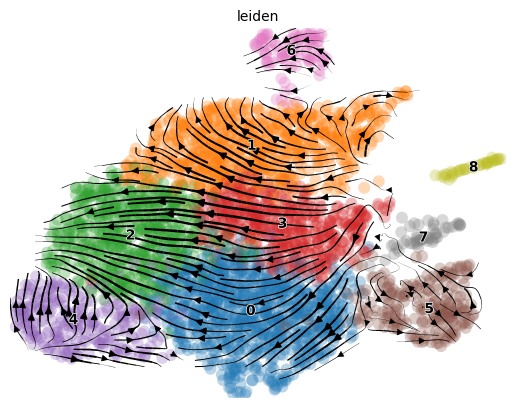

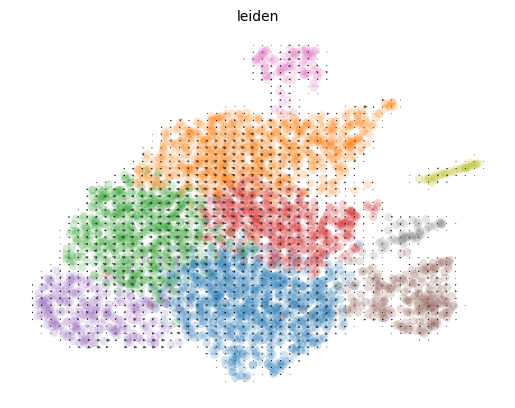

In [9]:
#Visualization with embedding stream
scv.pl.velocity_embedding_stream(adata,basis="umap" ,color='leiden')
#Visualization with embedding grid
scv.pl.velocity_embedding_grid(adata,basis="umap" ,color='leiden')

In [10]:
#Ranking velocity genes
scv.tl.rank_velocity_genes(adata , groupby='leiden')

ranking velocity genes


c:\Users\melod\anaconda3\lib\site-packages\scvelo\tools\utils.py:501: DeprecationWarning: Please use `rankdata` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import rankdata


    finished (0:00:01) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


In [11]:
#Set the result as dataframe 
df = scv.DataFrame(adata.uns['rank_velocity_genes']['names'])
df.head()

C:\Users\melod\AppData\Local\Temp\ipykernel_8468\2635908584.py:2: DeprecationWarning: `scvelo.read_load.get_df` is deprecated since scVelo v0.2.4 and will be removed in a future version. Please use `scvelo.core.get_df` instead.
  df = scv.DataFrame(adata.uns['rank_velocity_genes']['names'])


,0,1,2,3,4,5,6,7,8
0,Slc9a9,Fgf13,Cd36,Stap1,Fn1,Arhgap26,Apbb2,Rasgrp2,Grk6
1,Plekhg5,Ctss,Ccl5,Glipr1,Cd72,Rab11fip1,Cd72,Nedd9,Gk
2,Tslp,Apbb2,Ifih1,Klra2,Sirpb1b,Gm15987,Il7r,Mndal,Nedd9
3,Nhsl2,Bcl2l11,Clec4d,Bcl2a1d,Clec10a,Ldlr,Fgf13,Hspe1,Fgr
4,Bank1,Tgfbr1,Cd274,Hspe1,Ccl12,Chn2,Tgfbr1,Itga4,Gcnt2


computing terminal states
    identified 3 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


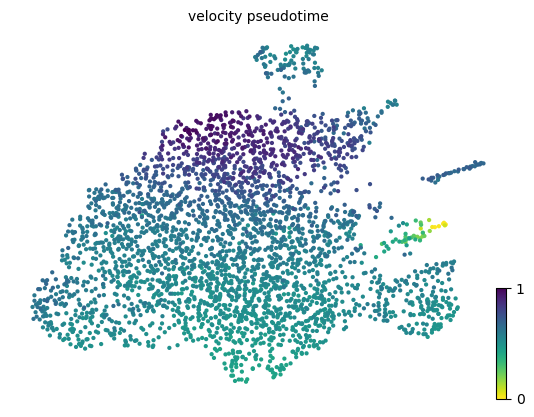

In [12]:
#Pseudotime
scv.tl.velocity_pseudotime(adata)
scv.pl.scatter(adata , color='velocity_pseudotime')

recovering dynamics (using 1/16 cores)


  0%|          | 0/303 [00:00<?, ?gene/s]

    finished (0:02:12) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/16 cores)


  0%|          | 0/3206 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


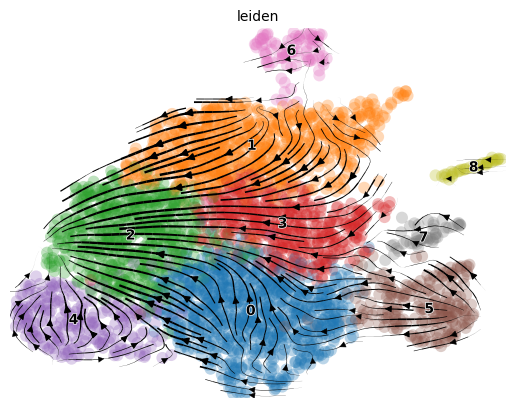

In [13]:
#Run the dynamical model to learn the full transcriptional dynamics of splicing kinetics.
scv.tl.recover_dynamics(adata)
scv.tl.velocity(adata ,mode ='dynamical')
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata , basis='umap',color='leiden')

computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


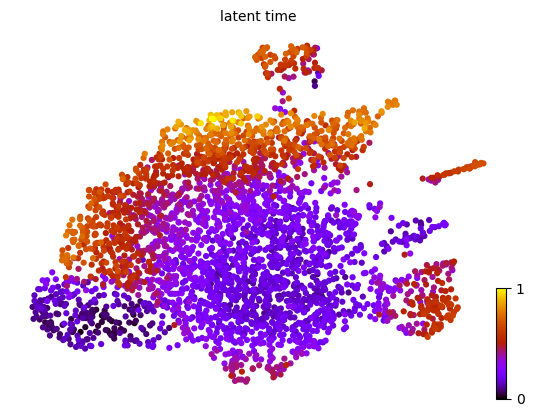

In [14]:
#Latent time
scv.tl.latent_time(adata)
scv.pl.scatter(adata , color = 'latent_time' , color_map='gnuplot',size=80)

c:\Users\melod\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\Users\melod\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


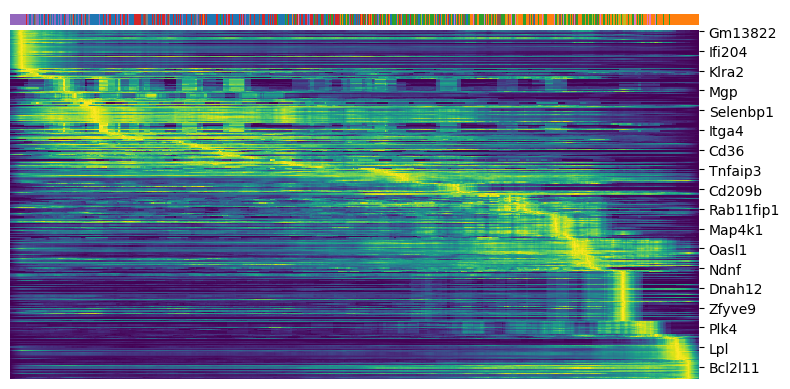

In [15]:
#Latent time with heatmap
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, sortby='latent_time', col_color='leiden', n_convolve=100)

In [16]:
#Save the result to h5ad 
adata.write_h5ad('C:/Users/melod/Desktop/RongRong/Dry/scRNA-seq_Tutorial/Progression_with_scvelo.h5ad')